Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('[DMC.RIP] Fishing.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)
df.head(8)

,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


In [109]:
df.columns

Index(['mode', 'price', 'catch', 'pbeach', 'ppier', 'pboat', 'pcharter',
       'cbeach', 'cpier', 'cboat', 'ccharter', 'income'],
      dtype='object')

### Задание 1

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [4]:
df['log_income'] = df.price.apply(np.log)

In [13]:
df.head(3)

,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,5.209104
1,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,3.541944
2,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,3.191875


### Задание 2

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [14]:
df.head(1)

,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,charter,182.93,0.5391,157.93,157.93,157.93,182.93,0.0678,0.0503,0.2601,0.5391,7083.3317,5.209104


In [5]:
df['pdiff'] = abs(df['price'] - df['pbeach'])

In [112]:
df.head(5)

,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,5.209104,25.000
1,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,3.541944,19.420
2,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,3.191875,137.540
3,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,2.716944,0.000
4,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,3.726031,65.416


### Задание 3

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [6]:
ex4 = df.groupby('mode').agg('mean')

In [114]:
ex4['price']

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [7]:
df_med4 = df.groupby('mode').agg('median')

In [8]:
df_mean4 = df.groupby('mode').agg('mean')

In [9]:
df_med4 - df_mean4

,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
mode,,,,,,,,,,,,,
beach,-16.391493,-0.025495,-16.391493,-16.391493,-19.733134,-20.138164,-0.025495,-0.069201,0.007101,0.021491,-301.616831,-0.097528,0.000000
boat,-17.004813,-0.121641,-36.887100,-36.887100,-17.004813,-16.714086,-0.103387,-0.050865,-0.121641,-0.256417,-904.106643,0.014207,-34.870746
charter,-18.226942,-0.269900,-28.602350,-28.602350,-19.693757,-18.226942,0.001792,-0.080634,-0.115863,-0.269900,-130.899620,-0.109214,-29.355735
pier,-13.942326,-0.052735,-13.942326,-13.942326,-13.724079,-14.487348,-0.007744,-0.052735,0.014151,0.041020,-470.505523,-0.042671,0.000000


In [14]:
ex5 = abs(df_med4 - df_mean4)

In [15]:
ex5

,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
mode,,,,,,,,,,,,,
beach,16.391493,0.025495,16.391493,16.391493,19.733134,20.138164,0.025495,0.069201,0.007101,0.021491,301.616831,0.097528,0.000000
boat,17.004813,0.121641,36.887100,36.887100,17.004813,16.714086,0.103387,0.050865,0.121641,0.256417,904.106643,0.014207,34.870746
charter,18.226942,0.269900,28.602350,28.602350,19.693757,18.226942,0.001792,0.080634,0.115863,0.269900,130.899620,0.109214,29.355735
pier,13.942326,0.052735,13.942326,13.942326,13.724079,14.487348,0.007744,0.052735,0.014151,0.041020,470.505523,0.042671,0.000000


In [11]:
import statistics

In [8]:
my_list = [20, 25, 27, 2000, 56, 45, 17, 46, 35, 37,-3000,5000]

In [10]:
sorted(my_list)

[-3000, 17, 20, 25, 27, 35, 37, 45, 46, 56, 2000, 5000]

In [6]:
statistics.mean(my_list)

7692639.076923077

In [11]:
statistics.median(my_list)

36.0

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.


In [123]:
pier = ex4.loc['pier']
pier.to_csv('pier.csv', index=False, header=None)

In [124]:
beach = ex4.loc['beach']
beach.to_csv('beach.csv', index=False, header=None)

In [125]:
boat = ex4.loc['boat']
boat.to_csv('boat.csv', index=False, header=None)

In [126]:
charter = ex4.loc['charter']
charter.to_csv('charter.csv', index=False, header=None)

### Задание 6

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [22]:
df.head(7)

,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,5.209104,25.000
1,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,3.541944,19.420
2,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,3.191875,137.540
3,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,2.716944,0.000
4,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,3.726031,65.416
5,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320,4.157851,128.540
6,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010,3.949974,0.000


In [23]:
df_ex7 = df.sort_values(['income'], ascending = False)

In [133]:
df_ex7.head(8)

,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.998,5.483078,73.212
130,boat,94.740,0.0108,205.270,205.270,94.740,129.740,0.0678,0.0025,0.0108,0.2377,12499.998,4.551136,110.530
932,boat,37.896,0.0531,227.376,227.376,37.896,62.896,0.2537,0.1498,0.0531,0.0052,12499.998,3.634846,189.480
36,pier,120.004,0.0789,120.004,120.004,252.640,281.640,0.0678,0.0789,0.0014,0.0029,12499.998,4.787525,0.000
377,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.998,5.794330,183.164
832,boat,47.370,0.0732,555.808,555.808,47.370,76.870,0.0678,0.0052,0.0732,0.1726,12499.998,3.857989,508.438
814,boat,47.370,0.0143,555.808,555.808,47.370,76.870,0.0678,0.0503,0.0143,0.0289,12499.998,3.857989,508.438
556,boat,37.896,0.2413,581.072,581.072,37.896,72.896,0.5333,0.4522,0.2413,1.0266,12499.998,3.634846,543.176


### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [136]:
cols = list(df_ex8.columns.values)

In [140]:
cols

['mode',
 'price',
 'catch',
 'pbeach',
 'ppier',
 'pboat',
 'pcharter',
 'cbeach',
 'cpier',
 'cboat',
 'ccharter',
 'income',
 'log_income',
 'pdiff']

In [24]:
cols1 = ['mode',
 'price',
 'income',
 'catch',
 'pbeach',
 'ppier',
 'pboat',
 'pcharter',
 'cbeach',
 'cpier',
 'cboat',
 'ccharter',
 'log_income',
  'pdiff']

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df) # разовый показ

In [156]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('expand_frame_repr', True)

In [157]:
df_ex8

,mode,price,income,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,log_income,pdiff
1013,beach,1.290,416.66668,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,0.254642,0.000
1105,pier,1.290,416.66668,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,0.254642,0.000
1157,pier,1.290,416.66668,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,0.254642,0.000
275,pier,2.290,1249.99980,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.0971,0.1648,0.828552,0.000
287,pier,2.290,1249.99980,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.1643,0.5391,0.828552,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,boat,328.432,12499.99800,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,5.794330,183.164
588,charter,330.072,6250.00130,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,5.799311,223.960
446,charter,335.314,8750.00100,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,5.815067,242.734
211,charter,387.208,7916.66630,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,5.958962,271.960


In [158]:
df_ex8.index

Int64Index([1013, 1105, 1157,  275,  287,  322,  323,  336,  339, 1012,
            ...
             357,  394,  400,  119,  343,  377,  588,  446,  211,  249],
           dtype='int64', length=1182)

In [159]:
len(df_ex8)

1182

In [174]:
df_ex8.index = list(range(1,1183))

In [175]:
df_ex8.head(15)

,mode,price,income,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,log_income,pdiff
1,beach,1.290,416.66668,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,0.254642,0.00
2,pier,1.290,416.66668,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,0.254642,0.00
3,pier,1.290,416.66668,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,0.254642,0.00
4,pier,2.290,1249.99980,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.0971,0.1648,0.828552,0.00
5,pier,2.290,1249.99980,0.0789,2.290,2.290,2.290,31.290,0.0678,0.0789,0.1643,0.5391,0.828552,0.00
6,pier,2.290,1249.99980,0.0503,2.290,2.290,2.290,27.290,0.0678,0.0503,0.2601,0.5391,0.828552,0.00
7,pier,2.290,1249.99980,0.0503,2.290,2.290,2.290,27.290,0.0678,0.0503,0.2601,0.5391,0.828552,0.00
8,beach,2.290,1249.99980,0.0678,2.290,2.290,2.290,27.290,0.0678,0.0503,0.0276,0.0029,0.828552,0.00
9,boat,2.290,1249.99980,0.0276,2.290,2.290,2.290,27.290,0.0678,0.0503,0.0276,0.0029,0.828552,0.00
10,beach,2.290,1249.99980,0.5333,2.290,2.290,70.990,105.990,0.5333,0.4522,0.1665,0.3975,0.828552,0.00


### Задание 8

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [177]:
df_ex8.isnull()

,mode,price,income,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,log_income,pdiff
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1179,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1180,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1181,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [178]:
df_ex8.isnull().sum()

mode          0
price         0
income        0
catch         0
pbeach        0
ppier         0
pboat         0
pcharter      0
cbeach        0
cpier         0
cboat         0
ccharter      0
log_income    0
pdiff         0
dtype: int64

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [4]:
import pandas as pd

In [3]:
import numpy as np

In [18]:
df_13_dop = pd.read_csv('[DMC.RIP] wgi_fh.csv',sep = ';', decimal = ',')

In [19]:
df_13_dop

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN
...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
210,South Africa,ZAF,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
211,"Congo, Dem. Rep.",ZAR,2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0
212,Zambia,ZMB,2016,-0.30,0.18,-0.66,-0.48,-0.30,-0.40,3.5


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [7]:
df_13_dop.info

<bound method DataFrame.info of               country cnt_code  year    va    ps    ge    rq    rl    cc   fh
0               Aruba      ABW  2016  1.27  1.28  0.90  1.35  1.29  1.29  NaN
1             Andorra      ADO  2016  1.20  1.40  1.86  0.87  1.56  1.23  1.0
2         Afghanistan      AFG  2016 -1.09 -2.75 -1.22 -1.33 -1.62 -1.56  6.0
3              Angola      AGO  2016 -1.17 -0.39 -1.04 -1.00 -1.08 -1.41  6.0
4            Anguilla      AIA  2016   NaN  1.31  1.33  0.87 -0.09  1.23  NaN
..                ...      ...   ...   ...   ...   ...   ...   ...   ...  ...
209            Serbia      SRB  2016  0.21  0.05  0.09  0.06 -0.12 -0.31  2.0
210      South Africa      ZAF  2016  0.64 -0.13  0.27  0.21  0.07  0.05  2.0
211  Congo, Dem. Rep.      ZAR  2016 -1.39 -2.20 -1.51 -1.32 -1.61 -1.33  6.0
212            Zambia      ZMB  2016 -0.30  0.18 -0.66 -0.48 -0.30 -0.40  3.5
213          Zimbabwe      ZWE  2016 -1.11 -0.61 -1.16 -1.72 -1.32 -1.28  5.0

[214 rows x 10 columns]>

In [8]:
df_13_dop.isnull().sum().sum()

50

### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [20]:
df_13_dop = df_13_dop.dropna()

In [21]:
df_13_dop.isnull().sum().sum()

0

### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [191]:
df_13_dop.head(5)

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


In [22]:
df_13_dop.loc[:,'cnt_code'] = 'cnt_code'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
df_13_dop.head(5)

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,cnt_code,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,cnt_code,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,cnt_code,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,cnt_code,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,cnt_code,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


In [23]:
del df_13_dop['cnt_code']

In [14]:
df_13_dop.head(5)

,country,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [24]:
df_13_dop = df_13_dop.sort_values(['cc','va'])

In [25]:
df_13_dop.reset_index(drop=True, inplace=True)

In [26]:
df_13_dop.head(5)

,country,year,va,ps,ge,rq,rl,cc,fh
0,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
1,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
2,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
3,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
4,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [28]:
df_13_dop['cc_round'] = np.round(df_13_dop['cc'], 1)

In [29]:
df_13_dop.head(7)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
0,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
1,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
2,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
3,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
4,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6
5,Syrian Arab Republic,2016,-1.96,-2.91,-1.82,-1.67,-2.01,-1.57,7.0,-1.6
6,Libya,2016,-1.37,-2.21,-1.89,-2.27,-1.87,-1.57,6.0,-1.6


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.


In [31]:
def func(x):
    if 1.0 <= x <= 2.5:
        return 'Free'
    elif 3.0 <= x <=  5.0:
        return 'Partly Free'
    elif 5.5 <= x <=  7.0:
        return 'Not Free'
    else:
        return 'NaN'

In [22]:
func(2)

'Free'

In [23]:
df_13_dop.head(3)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
0,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
1,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
2,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7


In [32]:
df_13_dop['fh_status'] = df_13_dop['fh'].apply(func)

In [33]:
df_13_dop.head(3)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
0,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
1,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
2,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free


In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_13_dop) # разовый показ

                            country  year    va    ps    ge    rq    rl    cc  \
0                 Equatorial Guinea  2016 -1.93 -0.19 -1.41 -1.38 -1.44 -1.81   
1                           Somalia  2016 -1.83 -2.33 -2.18 -2.27 -2.37 -1.69   
2                       Yemen, Rep.  2016 -1.65 -2.79 -1.82 -1.48 -1.60 -1.67   
3                             Sudan  2016 -1.80 -2.38 -1.41 -1.49 -1.26 -1.61   
4                       South Sudan  2016 -1.67 -2.42 -2.26 -1.86 -1.69 -1.58   
5              Syrian Arab Republic  2016 -1.96 -2.91 -1.82 -1.67 -2.01 -1.57   
6                             Libya  2016 -1.37 -2.21 -1.89 -2.27 -1.87 -1.57   
7                       Afghanistan  2016 -1.09 -2.75 -1.22 -1.33 -1.62 -1.56   
8                     Guinea-Bissau  2016 -0.70 -0.50 -1.64 -1.24 -1.49 -1.56   
9                      Turkmenistan  2016 -2.13 -0.31 -1.14 -2.09 -1.56 -1.46   
10                 Korea, Dem. Rep.  2016 -2.13 -0.71 -1.65 -2.33 -1.63 -1.45   
11                          

In [35]:
df_13_dop.isnull().values.any()

False

### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [36]:
df_13_dop.groupby('fh_status')

In [37]:
df_8min = df_13_dop.groupby('fh_status').agg('min')

In [47]:
df_8min.loc[:,'ps']

fh_status
Free          -0.99
Not Free      -2.91
Partly Free   -2.47
Name: ps, dtype: float64

In [38]:
df_8max = df_13_dop.groupby('fh_status').agg('max')

In [39]:
df_8max.loc[:,'ps']

fh_status
Free           1.49
Not Free       1.26
Partly Free    1.53
Name: ps, dtype: float64

In [40]:
df_8mean = df_13_dop.groupby('fh_status').agg('mean')

In [41]:
df_8mean.loc[:,'ps']

fh_status
Free           0.619059
Not Free      -0.875800
Partly Free   -0.424000
Name: ps, dtype: float64

### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.


In [54]:
df_13_free = df_13_dop[df_13_dop['fh_status'] == 'Free']
df_13_free.to_csv('df_13_free.csv', index=False, header=None)
df_13_free.head(7)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
70,El Salvador,2016,0.28,-0.06,-0.28,0.09,-0.71,-0.57,2.5,-0.6,Free
75,Mongolia,2016,0.45,0.82,-0.11,-0.08,-0.22,-0.50,1.5,-0.5,Free
76,Panama,2016,0.53,0.43,0.19,0.36,0.03,-0.49,2.0,-0.5,Free
77,Benin,2016,0.50,0.05,-0.57,-0.53,-0.65,-0.48,2.0,-0.5,Free
79,Nauru,2016,0.52,0.55,-0.69,-0.38,-0.80,-0.47,2.0,-0.5,Free
80,Palau,2016,1.23,0.93,-0.41,-0.18,0.32,-0.47,1.0,-0.5,Free
83,Brazil,2016,0.47,-0.45,-0.18,-0.21,-0.08,-0.44,2.0,-0.4,Free


In [55]:
df_13_not_free = df_13_dop[df_13_dop['fh_status'] == 'Not Free']
df_13_not_free.to_csv('df_13_not_free.csv', index=False, header=None)
df_13_not_free.head(7)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
1,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
2,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
3,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
4,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
5,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free
6,Syrian Arab Republic,2016,-1.96,-2.91,-1.82,-1.67,-2.01,-1.57,7.0,-1.6,Not Free
7,Libya,2016,-1.37,-2.21,-1.89,-2.27,-1.87,-1.57,6.0,-1.6,Not Free


In [57]:
df_13_partly_free = df_13_dop[df_13_dop['fh_status'] == 'Partly Free']
df_13_partly_free.to_csv('df_13_partly_free.csv', index=False, header=None)
df_13_partly_free.head(7)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
9,Guinea-Bissau,2016,-0.70,-0.50,-1.64,-1.24,-1.49,-1.56,5.0,-1.6,Partly Free
15,"Venezuela, RB",2016,-1.13,-1.03,-1.29,-2.00,-2.18,-1.39,5.0,-1.4,Partly Free
16,Haiti,2016,-0.73,-0.67,-2.06,-1.24,-1.00,-1.35,5.0,-1.4,Partly Free
20,Zimbabwe,2016,-1.11,-0.61,-1.16,-1.72,-1.32,-1.28,5.0,-1.3,Partly Free
26,Kyrgyz Republic,2016,-0.49,-0.66,-0.90,-0.35,-1.10,-1.08,5.0,-1.1,Partly Free
29,Nigeria,2016,-0.30,-1.85,-1.09,-0.92,-1.05,-1.04,4.5,-1.0,Partly Free
30,Lebanon,2016,-0.52,-1.56,-0.53,-0.34,-0.86,-0.97,4.5,-1.0,Partly Free


In [97]:
len(df_13_dop)

195

In [47]:
df_13_dop.index = list(range(1,196))

In [48]:
df_13_dop.head(5)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
1,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
2,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
3,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
4,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
5,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free


### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [57]:
my_list =[
    ['China',24273],
    ['USA',20937],
    ['India',8907],
    ['Germany',4470],
    ['Russia',4133],
    ['Indonesia',3302],
    ['Brasilia', 3154],
    ['France', 3115],
    ['United Kingdom', 3019],
    ['Turkey', 2372],
    
]

In [58]:
df10 = pd.DataFrame(my_list, columns = ['Country','GDP'])

In [59]:
df10

,Country,GDP
0,China,24273
1,USA,20937
2,India,8907
3,Germany,4470
4,Russia,4133
5,Indonesia,3302
6,Brasilia,3154
7,France,3115
8,United Kingdom,3019
9,Turkey,2372


In [61]:
import matplotlib.pyplot as plt

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

In [75]:
df10['Country']

0             China
1               USA
2             India
3           Germany
4            Russia
5         Indonesia
6          Brasilia
7            France
8    United Kingdom
9            Turkey
Name: Country, dtype: object

In [76]:
df10['GDP']

0    24273
1    20937
2     8907
3     4470
4     4133
5     3302
6     3154
7     3115
8     3019
9     2372
Name: GDP, dtype: int64

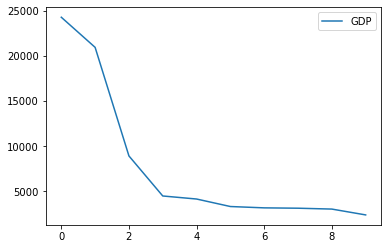

In [83]:
df10.plot()

In [89]:
df10['Country'].tolist()

['China',
 'USA',
 'India',
 'Germany',
 'Russia',
 'Indonesia',
 'Brasilia',
 'France',
 'United Kingdom',
 'Turkey']

In [90]:
df10['GDP'].tolist()

[24273, 20937, 8907, 4470, 4133, 3302, 3154, 3115, 3019, 2372]

In [ ]:
df10.plot.bar(x = df10['Country'].tolist(), y = df10['GDP'].tolist()) # error

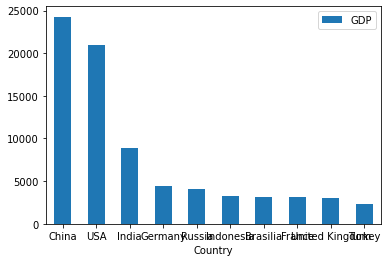

In [91]:
df10.plot.bar(x='Country', y='GDP', rot=0)